In [1]:
import scipy
from scipy.integrate import odeint

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import lmfit
from lmfit.lineshapes import gaussian, lorentzian

plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
DATA_PATH = '../covid-19-data/public/data/owid-covid-data.csv'
# DATA_PATH = '../covid-19-data/public/data/ecdc/full_data.csv'

df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.shape

(17215, 29)

In [3]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  17151 non-null  object        
 1   location                  17215 non-null  object        
 2   date                      17215 non-null  datetime64[ns]
 3   total_cases               17215 non-null  int64         
 4   new_cases                 17215 non-null  int64         
 5   total_deaths              17215 non-null  int64         
 6   new_deaths                17215 non-null  int64         
 7   total_cases_per_million   16909 non-null  float64       
 8   new_cases_per_million     16909 non-null  float64       
 9   total_deaths_per_million  16909 non-null  float64       
 10  new_deaths_per_million    16909 non-null  float64       
 11  total_tests               4455 non-null   float64       
 12  new_tests         

In [5]:
df['iso_code'].value_counts().head(30)

CZE         136
EST         136
FIN         136
CAN         136
CHE         136
SGP         136
CHN         136
NOR         136
ISL         136
NLD         136
OWID_WRL    136
GBR         136
DNK         136
DEU         136
IRN         136
RUS         136
AUS         136
USA         136
JPN         136
ISR         136
BRA         136
HRV         136
ITA         136
MEX         136
SWE         136
AUT         136
KOR         136
BEL         136
FRA         136
MYS         135
Name: iso_code, dtype: int64

*choose a country*

In [6]:
COUNTRY = 'SGP'  # 'SGP', 'MYS', 'DEU', 'OWID_WRL'

START_DATE = '2020-02-28'

In [7]:
df_country = df[df['iso_code'] == COUNTRY]
df_country = df_country[df_country['date'] > START_DATE]
df_country

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
14175,SGP,Singapore,2020-02-29,98,2,0,0,16.751,0.342,0.000,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14176,SGP,Singapore,2020-03-01,102,4,0,0,17.435,0.684,0.000,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14177,SGP,Singapore,2020-03-02,106,4,0,0,18.119,0.684,0.000,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14178,SGP,Singapore,2020-03-03,108,2,0,0,18.460,0.342,0.000,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14179,SGP,Singapore,2020-03-04,110,2,0,0,18.802,0.342,0.000,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,SGP,Singapore,2020-05-10,22460,753,20,0,3839.091,128.710,3.419,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14247,SGP,Singapore,2020-05-11,23336,876,20,0,3988.826,149.735,3.419,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14248,SGP,Singapore,2020-05-12,23787,451,21,1,4065.915,77.089,3.590,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
14249,SGP,Singapore,2020-05-13,24671,884,21,0,4217.018,151.102,3.590,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4


In [37]:
df_country['date'].max()

Timestamp('2020-05-14 00:00:00')

### weekly case counts

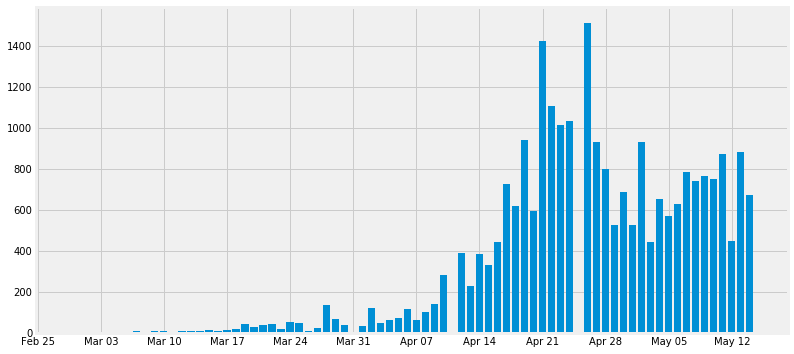

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
    
ax.bar(df_country['date'], df_country['new_cases'])
ax.xaxis_date()
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

### cumulative total case counts (log)

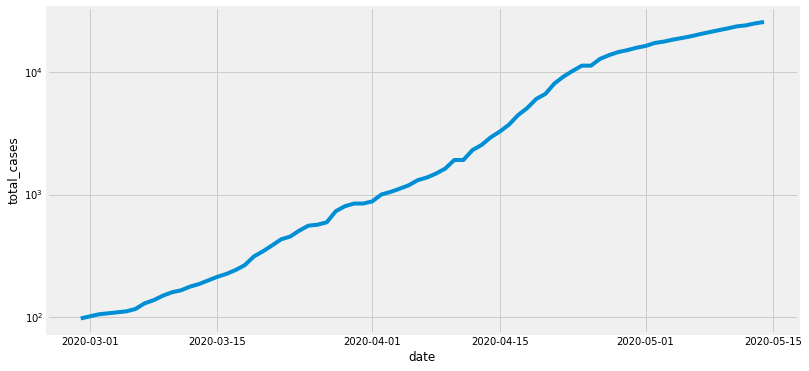

In [9]:
fig, ax = plt.subplots(figsize = (12,6)) 
plt.yscale('log')

sns.lineplot(data=df_country, y='total_cases', x='date', ax=ax)

In [10]:
# fig, ax = plt.subplots(figsize = (12,6)) 

# x_dates = df_sgp['date'].dt.strftime('%Y-%M-%D').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

# sns.barplot(data=df_sgp, y='new_cases', x='date', ci=None, ax=ax)

## SIR model with ODE  

In [11]:
def sir_model(y, t, N, beta, gamma):
    '''
    N: total population
    S(t): no. of susceptible ppl on day t
    I(t): no. of infected ppl on day t
    R(t): no. of recovered on day t
    beta: expected amount of people an infected person infects per day
    D: number of days an infected person has and can spread the disease
    gamma: proportion of infected recovering per day (gamma = 1/D)
    R_0: total no. of people an infected person infects (R_0 = beta / gamma)
    '''
    S, I, R = y
    
    dSdt = -beta * S * (I / N)
    dIdt = beta * S * (I / N) - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

### demo SIR ODE: set initial conditions

In [12]:
N = 1000000
beta = 1.0  # infected person infects 1 other person per day
D = 21.0  # infections lasts four days
gamma = 1.0 / D

days = 100

I0 = 20
S0 = N - I0
R0 = 0

In [13]:
t = np.linspace(0, days, days)  # time grid (in days)

y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
result = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = result.T

In [14]:
result.shape

(100, 3)

In [15]:
result[99]

array([1.03365580e-03, 1.47546919e+04, 9.85245307e+05])

In [16]:
def plot_sir(t, S, I, R, x_ticks):
    f, ax = plt.subplots(1, 1, figsize=(12,6))
    
    ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=1, label='Susceptible')  # TODO: t
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(x_ticks, R, 'y', alpha=0.7, linewidth=1, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
        
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

In [17]:
first_date = np.datetime64(df_country['date'].min()) - np.timedelta64(0, 'D')

x_ticks = pd.date_range(start=first_date, periods=days, freq="D")

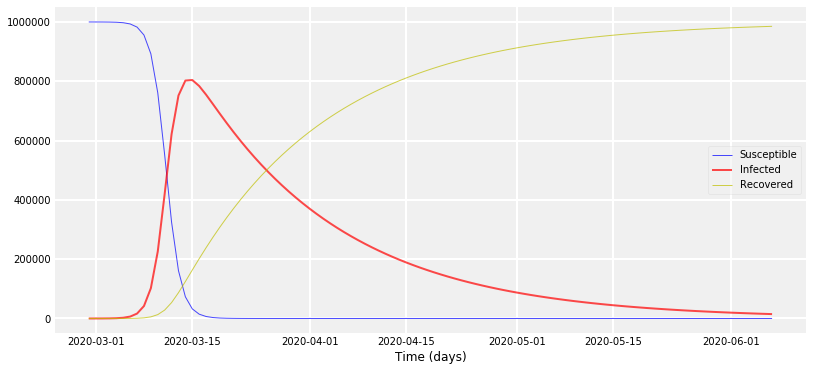

In [18]:
plot_sir(t, S, I, R, x_ticks)

### curve fitting example with lmfit

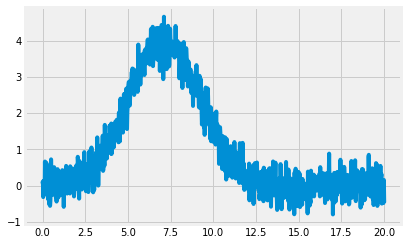

In [19]:
np.random.seed(555)
x = np.linspace(0, 20.0, 1000)

data = (gaussian(x, 21, 7.1, 2.1) + np.random.normal(scale=0.3, size=x.size))  # normal distr. with some noise

plt.plot(x, data)

In [20]:
# define a function that takes x as the first argument, and then the parameters to be fitted (a, b, c)
def f(x, a, b, c):
    return gaussian(x, a, b, c)


mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10.0, vary=True)
mod.set_param_hint("b", value=5.0, vary=True)
mod.set_param_hint("c", value=1.0, vary=True)

params = mod.make_params()
params

name,value,initial value,min,max,vary
a,10.0000000,None,-inf,inf,True
b,5.00000000,None,-inf,inf,True
c,1.00000000,None,-inf,inf,True


{'a': 20.893950161752713, 'b': 7.1071101616645285, 'c': 2.0980312203106943}

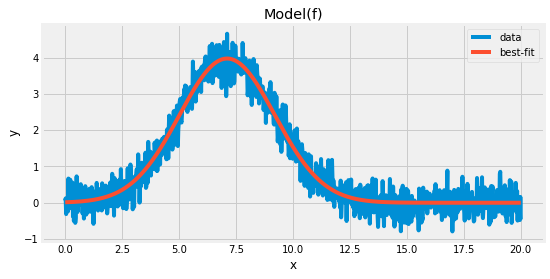

In [21]:
# fitting
result = mod.fit(data, params, method="leastsq", x=x)

plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

In [22]:
# result

# curve fitting with real country data  

set initial conditions

In [23]:
data = df_country['new_cases'].values
data

array([   2,    4,    4,    2,    2,    2,    5,   13,    8,   12,   10,
          6,   12,    9,   13,   14,   12,   17,   23,   47,   32,   40,
         47,   23,   54,   49,   10,   26,  138,   71,   41,    0,   35,
        121,   49,   65,   75,  120,   66,  106,  142,  286,    0,  390,
        233,  386,  334,  447,  728,  623,  942,  596, 1426, 1111, 1016,
       1037,    0, 1515,  931,  799,  528,  690,  528,  932,  447,  657,
        573,  632,  788,  741,  768,  753,  876,  451,  884,  675])

In [24]:
N = 5000000

# find beta & gamma from fitting
# beta = 2.0  # infected person infects 1 other person per day
# D = 14.0  # infections lasts four days
# gamma = 1.0 / D

days = len(data)
days

76

In [25]:
def Model_SIR(days, N, beta, gamma):
    t = np.linspace(0, days-1, days, dtype=int)  # time grid (in days)

    y0 = N-1, 1, 0  # S0, I0, R0

    # Integrate the equations over the time grid, t.
    result = odeint(sir_model, y0, t, args=(N, beta, gamma))
    S, I, R = result.T
    return t, S, I, R

In [26]:
def fit_model(x, N, beta, gamma):
    """
    returns: infections I per day ? 
    """
    return Model_SIR(days, N, beta, gamma)[2][x]

In [27]:
# initiate model

mod = lmfit.Model(fit_model)

mod.set_param_hint("N", value=N, min=0, vary=True)
mod.set_param_hint("beta", value=1.0, min=0, vary=True)
mod.set_param_hint("gamma", value=0.1, min=0, max=1, vary=True)

params = mod.make_params()
params

name,value,initial value,min,max,vary
N,5000000.00,None,0.00000000,inf,True
beta,1.00000000,None,0.00000000,inf,True
gamma,0.10000000,None,0.00000000,1.00000000,True


In [28]:
# fitting

x_data = np.linspace(0, days-1, days, dtype=int)  # time grid (in days)

results = mod.fit(data, params, method="leastsq", x=x_data)  # leastsq, least_squares?

{'N': 2369.3981487405667,
 'beta': 0.2077836580843253,
 'gamma': 0.05969558687487386}

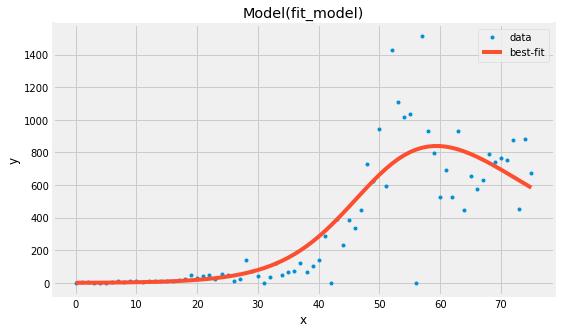

In [29]:
plt.figure(figsize=(8,5))
results.plot_fit(datafmt=".", fitfmt="-");
results.best_values

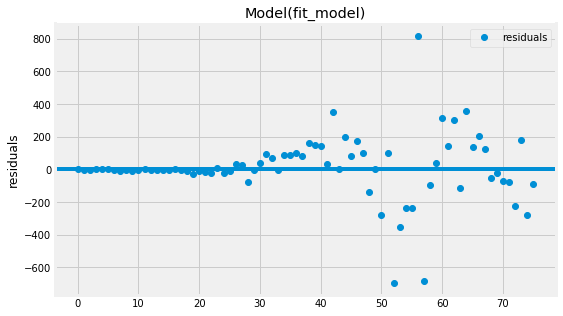

In [30]:
plt.figure(figsize=(8,5))
results.plot_residuals()

In [31]:
results

In [32]:
def plot_sir2(t, S, I, R, x_ticks):
    f, ax = plt.subplots(1, 1, figsize=(12,8))
    ax.set_title('Country: %s' % COUNTRY, fontsize= 20) 
    
    ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=1, label='Susceptible')  # TODO: t
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(x_ticks, R, 'y', alpha=0.7, linewidth=1, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # ax.set_ylim(0, 1800)
    
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
    # overlay actual data
    ax.bar(df_country['date'], df_country['new_cases'])

    plt.show()

In [33]:
def plot_infected(t, S, I, R, x_ticks):
    f, ax = plt.subplots(1, 1, figsize=(12,8))
    ax.set_title('Country: %s' % COUNTRY, fontsize= 20) 
    
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected (prediction)')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # ax.set_ylim(0, 1800)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    # overlay actual data
    ax.bar(df_country['date'], df_country['new_cases'])

    plt.show()

In [34]:
max_days = 210

first_date = np.datetime64(df_country['date'].min()) - np.timedelta64(0, 'D')

x_ticks = pd.date_range(start=first_date, periods=max_days, freq="D")

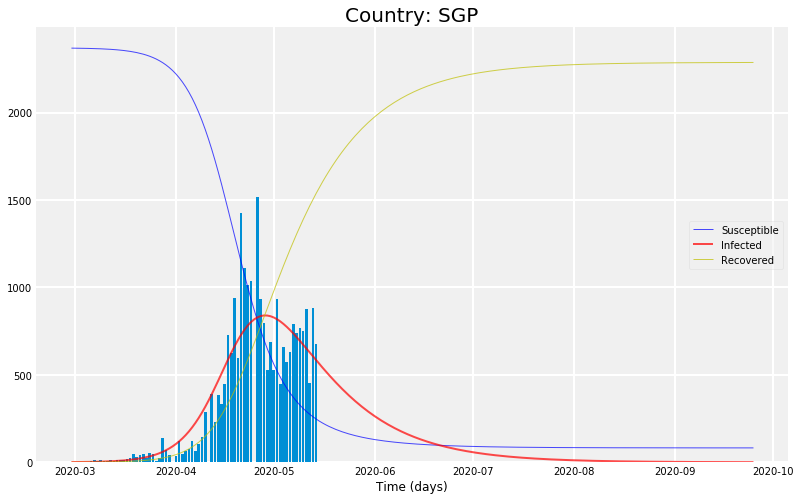

In [35]:
plot_sir2(*Model_SIR(max_days, **results.best_values), x_ticks)

# observations

- It is difficult to make predictions for different countries with the evolving situation and resources available. A country could be at different stages of the outbreak
- A more complicated model could be used e.g. SEIR 